In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
batch_size = 32
dataset_code = 'B'
model_name = 'MobileNet'
data_saved_dir = r'E:\Post-Flood-Disaster-Management\Classification\pickle_data'
model_saved_dir = r'E:\Post-Flood-Disaster-Management\Classification\models'

floodnet_testing = f'{data_saved_dir}\\floodnet_testing.pkl'
aider_testing = f'{data_saved_dir}\AIDER_testing.pkl'
floodAreaSeg_testing = f'{data_saved_dir}\FloodAreaSeg_testing.pkl'
download_testing = f'{data_saved_dir}\Downloaded_testing.pkl'

In [3]:
model = load_model(f'{model_saved_dir}\B_MobileNet\B_MobileNet-weights-improvement-05-0.95.hdf5')
print('Best model loaded ...')

Best model loaded ...


### FloodNet

Testing images: (62, 256, 256, 3)
Class Balance: [0: 53, 1: 9]
2/2 [==============================] - 1s 452ms/step


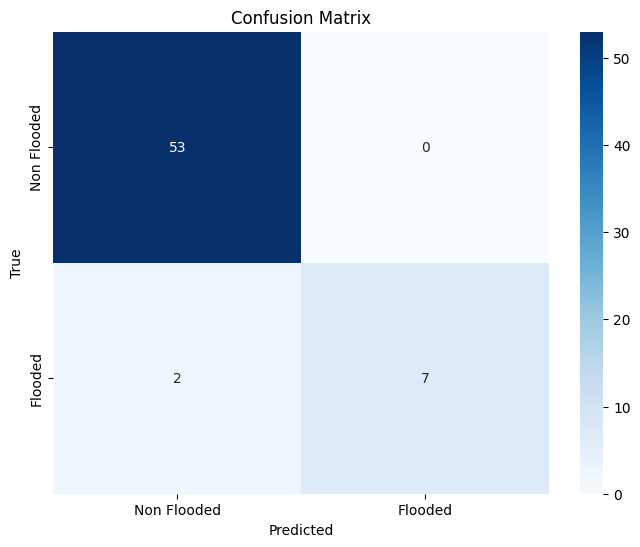

Accuracy: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.78      0.88         9

    accuracy                           0.97        62
   macro avg       0.98      0.89      0.93        62
weighted avg       0.97      0.97      0.97        62



In [4]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data


test_images, test_labels = load_pickle(floodnet_testing)
print(f'Testing images: {test_images.shape}')

class0 = len([i for i in test_labels if i == 0])
print(f'Class Balance: [0: {class0}, 1: {len(test_labels)-class0}]')

predictions = model.predict(test_images)

predicted_labels = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Flooded', 'Flooded'], yticklabels=['Non Flooded', 'Flooded'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy_score(test_labels, predicted_labels)}')
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

### AIDER

Testing images: (739, 256, 256, 3)
Class Balance: [0: 659, 1: 80]
24/24 [==============================] - 12s 497ms/step


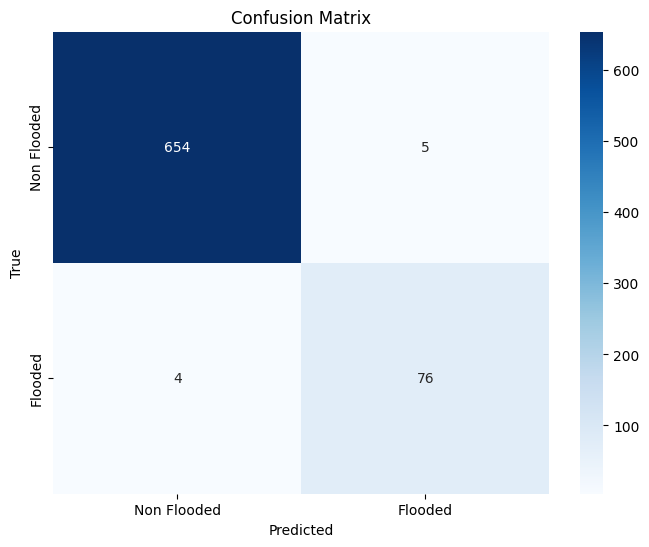

Accuracy: 0.9878213802435724
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       659
           1       0.94      0.95      0.94        80

    accuracy                           0.99       739
   macro avg       0.97      0.97      0.97       739
weighted avg       0.99      0.99      0.99       739



In [5]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data


test_images, test_labels = load_pickle(aider_testing)
print(f'Testing images: {test_images.shape}')

class0 = len([i for i in test_labels if i == 0])
print(f'Class Balance: [0: {class0}, 1: {len(test_labels)-class0}]')

predictions = model.predict(test_images)

predicted_labels = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Flooded', 'Flooded'], yticklabels=['Non Flooded', 'Flooded'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy_score(test_labels, predicted_labels)}')
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

### FloodAreaSegmentation

Testing images: (44, 256, 256, 3)
Class Balance: [0: 0, 1: 44]
2/2 [==============================] - 1s 249ms/step


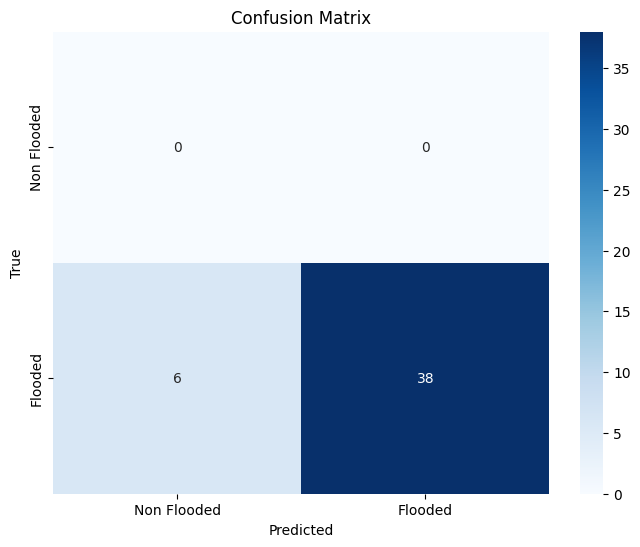

Accuracy: 0.8636363636363636
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.86      0.93        44

    accuracy                           0.86        44
   macro avg       0.50      0.43      0.46        44
weighted avg       1.00      0.86      0.93        44



c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [6]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data


test_images, test_labels = load_pickle(floodAreaSeg_testing)
print(f'Testing images: {test_images.shape}')

class0 = len([i for i in test_labels if i == 0])
print(f'Class Balance: [0: {class0}, 1: {len(test_labels)-class0}]')

predictions = model.predict(test_images)

predicted_labels = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Flooded', 'Flooded'], yticklabels=['Non Flooded', 'Flooded'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy_score(test_labels, predicted_labels)}')
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

### Google Images

Testing images: (145, 256, 256, 3)
Class Balance: [0: 52, 1: 93]
5/5 [==============================] - 2s 474ms/step


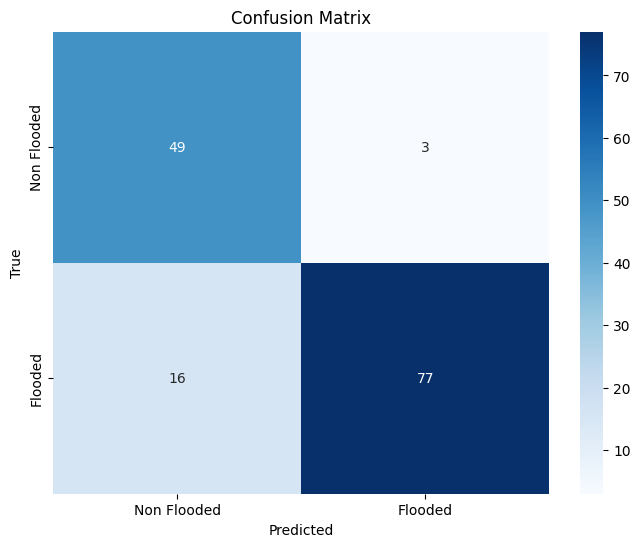

Accuracy: 0.8689655172413793
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84        52
           1       0.96      0.83      0.89        93

    accuracy                           0.87       145
   macro avg       0.86      0.89      0.86       145
weighted avg       0.89      0.87      0.87       145



In [7]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data


test_images, test_labels = load_pickle(download_testing)
print(f'Testing images: {test_images.shape}')

class0 = len([i for i in test_labels if i == 0])
print(f'Class Balance: [0: {class0}, 1: {len(test_labels)-class0}]')

predictions = model.predict(test_images)

predicted_labels = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Flooded', 'Flooded'], yticklabels=['Non Flooded', 'Flooded'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy_score(test_labels, predicted_labels)}')
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))